
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the Syntech Securian 401K.  Construct portfolios from the Investment Options in the Syntech Securian 401K and examine the results of different weighting schemes.  See investPerfPlan.pdf.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['securian-401k']
risk_free_rate = 1.10
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
0,Minnesota Life General Account,Risk-Free Asset,0.45,0.45,0.45,0.00,0.45,0.00
1,Securian AM Money Market,Cash Equivalents:Money Markets,-0.03,1.25,1.07,0.28,1.07,-0.01
2,Hotchkis & Wiley High Yield I,US Bonds:High Yield,20.56,4.55,6.10,11.35,6.10,0.44
3,Loomis Sayles Investment Grade Bond Adm,US Bonds:Investment Grade,7.25,6.66,5.58,5.49,5.58,0.82
4,Metropolitan West Total Return Bd Admin,US Bonds,1.54,5.82,3.79,3.65,3.79,0.74
5,Columbia Limited Duration Credit Adv,US Bonds,3.87,4.70,3.55,4.38,3.55,0.56
6,Columbia Contrarian Core,US Stocks,43.28,19.67,16.63,19.12,16.63,0.81
7,Securian AM S&P 500 Index,US Stocks:Large Cap,39.96,17.74,16.85,18.48,16.85,0.85
8,ClearBridge Large Cap Growth,US Stocks:Growth,34.97,19.94,19.34,19.25,19.34,0.95
9,Morgan Stanley Advantage Large Growth,US Stocks:Growth,44.19,27.75,26.11,22.58,26.11,1.11


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
9,Morgan Stanley Advantage Large Growth,US Stocks:Growth,44.19,27.75,26.11,22.58,26.11,1.11
8,ClearBridge Large Cap Growth,US Stocks:Growth,34.97,19.94,19.34,19.25,19.34,0.95
7,Securian AM S&P 500 Index,US Stocks:Large Cap,39.96,17.74,16.85,18.48,16.85,0.85
3,Loomis Sayles Investment Grade Bond Adm,US Bonds:Investment Grade,7.25,6.66,5.58,5.49,5.58,0.82
4,Metropolitan West Total Return Bd Admin,US Bonds,1.54,5.82,3.79,3.65,3.79,0.74
5,Columbia Limited Duration Credit Adv,US Bonds,3.87,4.70,3.55,4.38,3.55,0.56
0,Minnesota Life General Account,Risk-Free Asset,0.45,0.45,0.45,0.00,0.45,0.00
18,Ivy Securian Real Estate Securities Y,Real Estate,35.09,12.41,7.83,17.11,7.83,0.39
17,Invesco Oppenheimer International Gr A,Global Stocks,41.16,10.78,10.90,18.39,10.90,0.53
16,TIAA-CREF International Eq Idx Instl,Global Stocks,38.14,8.43,9.91,17.76,9.91,0.50


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'Securian AM S&P 500 Index': 0.50,
    'Metropolitan West Total Return Bd Admin': 0.50
}

# put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'Securian AM S&P 500 Index': 0.50,
    'Minnesota Life General Account': 0.50
}

# top dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'Morgan Stanley Advantage Large Growth': 1/7,
    'Ivy Securian Real Estate Securities Y': 1/7,
    'Invesco Oppenheimer International Gr A': 1/7,
    'Securian AM Money Market': 1/7,
    'Loomis Sayles Investment Grade Bond Adm': 1/7,
    'Vanguard LifeStrategy Cnsrv Gr Inv': 1/7,
    'Minnesota Life General Account': 1/6
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'Securian AM S&P 500 Index': 1/2,
    'Metropolitan West Total Return Bd Admin': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'Securian AM S&P 500 Index': 1/3,
    'Metropolitan West Total Return Bd Admin': 1/3,
    'Minnesota Life General Account': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'Securian AM S&P 500 Index': 1/4,
    'ClearBridge Large Cap Growth': 1/4,
    'Morgan Stanley Advantage Large Growth': 1/4,
    'Invesco Oppenheimer International Gr A': 1/4   
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'Securian AM S&P 500 Index': 0.90,
    'Minnesota Life General Account': 0.10
}

# https://www.forbes.com/sites/baldwin/2016/07/25/eight-famous-portfolios/#42c50d7d5cce
# american households: 25% real estate, 30% stocks, 30% fixed income, 5% cash, 10% alternatives
american_households_portfolio = {
    'Title': 'American Households Portfolio',
    'Ivy Securian Real Estate Securities Y': 0.25,
    'Securian AM S&P 500 Index': 0.30,
    'Minnesota Life General Account': 0.30,
    'Securian AM Money Market': 0.05,
    'DFA Emerging Markets Value I': 0.10
}

# janet yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'Minnesota Life General Account': 0.50,
    'Securian AM S&P 500 Index': 0.40,
    'Securian AM Money Market': 0.10
}

# securian-401k, risk off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'Minnesota Life General Account': 1/3,
    'Metropolitan West Total Return Bd Admin': 1/3,
    'Securian AM Money Market': 1/3
}

# securian-401k, risk on: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'Morgan Stanley Advantage Large Growth': 1/3,
    'Invesco Oppenheimer International Gr A':1/3,
    'Vanguard Small Cap Growth Index Admiral': 1/3
}

# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

# fja0568 current allocations
fja_portfolio = {
    'Title': 'Farrell Portfolio',
    'Minnesota Life General Account': 0.10,
    'Metropolitan West Total Return Bd Admin': 0.40,
    'Securian AM S&P 500 Index': 0.50
}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': 'Equal',
                          'US Stocks': 0.50,
                          'US Bonds': 0.40,
                          'Risk-Free Asset': 0.10},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,Morgan Stanley Advantage Large Growth,ClearBridge Large Cap Growth,Securian AM S&P 500 Index,Loomis Sayles Investment Grade Bond Adm,Metropolitan West Total Return Bd Admin,Columbia Limited Duration Credit Adv,Minnesota Life General Account,Ivy Securian Real Estate Securities Y,Invesco Oppenheimer International Gr A,TIAA-CREF International Eq Idx Instl,DFA Emerging Markets Value I,Securian AM Money Market,Vanguard LifeStrategy Cnsrv Gr Inv,Vanguard LifeStrategy Moderate Gr Inv,Vanguard LifeStrategy Growth Inv,Ranked Portfolio
Annual Returns,26.11,19.34,16.85,5.58,3.79,3.55,0.45,7.83,10.90,9.91,11.85,1.07,7.76,10.07,12.36,12.60
Std Dev,22.58,19.25,18.48,5.49,3.65,4.38,0.00,17.11,18.39,17.76,21.88,0.28,7.79,11.27,14.85,10.46
Sharpe Ratio,1.11,0.95,0.85,0.82,0.74,0.56,0.00,0.39,0.53,0.50,0.49,-0.01,0.85,0.80,0.76,1.10
Weight,0.21,0.16,0.14,0.17,0.12,0.11,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
Worst Typical Down Year,-19.05,-19.16,-20.11,-5.40,-3.51,-5.21,0.45,-26.39,-25.88,-25.61,-31.91,0.51,-7.82,-12.47,-17.34,-8.32
Black Swan,-41.63,-38.41,-38.59,-10.89,-7.16,-9.59,0.45,-43.50,-44.27,-43.37,-53.79,0.23,-15.61,-23.74,-32.19,-18.78


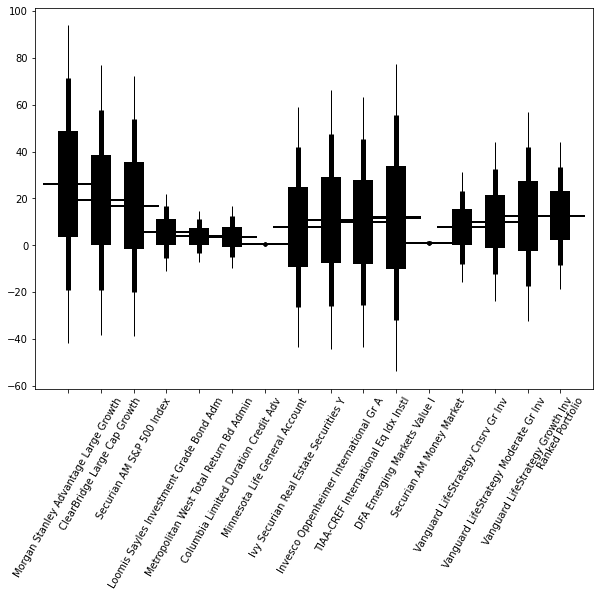

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

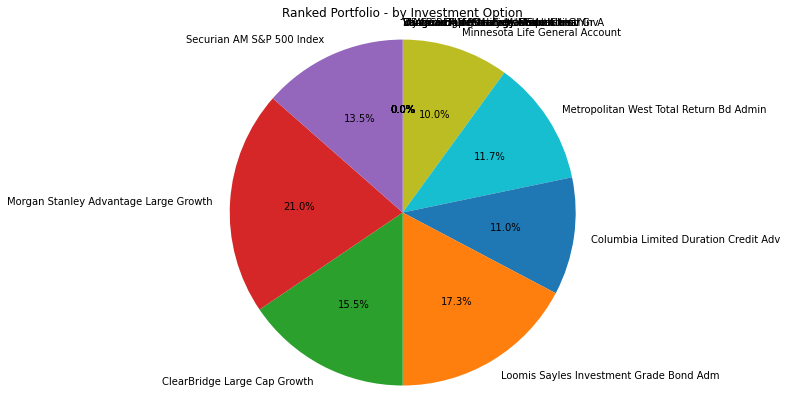

Vanguard LifeStrategy Cnsrv Gr Inv        0.00
Vanguard LifeStrategy Growth Inv          0.00
Vanguard LifeStrategy Moderate Gr Inv     0.00
Securian AM Money Market                  0.00
TIAA-CREF International Eq Idx Instl      0.00
Invesco Oppenheimer International Gr A    0.00
DFA Emerging Markets Value I              0.00
Ivy Securian Real Estate Securities Y     0.00
Minnesota Life General Account            0.10
Metropolitan West Total Return Bd Admin   0.12
Columbia Limited Duration Credit Adv      0.11
Loomis Sayles Investment Grade Bond Adm   0.17
ClearBridge Large Cap Growth              0.16
Morgan Stanley Advantage Large Growth     0.21
Securian AM S&P 500 Index                 0.14



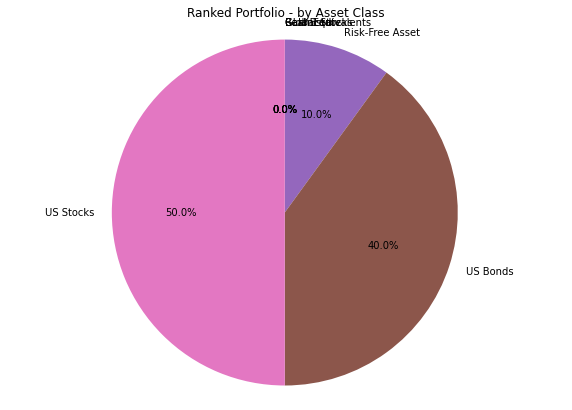

Balanced           0.00
Cash Equivalents   0.00
Global Stocks      0.00
Real Estate        0.00
Risk-Free Asset    0.10
US Bonds           0.40
US Stocks          0.50



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Class'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    Morgan Stanley Advantage Large Growth 0.2096
    ClearBridge Large Cap Growth   0.1552
    Securian AM S&P 500 Index      0.1352
    Loomis Sayles Investment Grade Bond Adm 0.1728
    Metropolitan West Total Return Bd Admin 0.1173
    Columbia Limited Duration Credit Adv 0.1099
    Minnesota Life General Account 0.1000
    Ivy Securian Real Estate Securities Y 0.0000
    Invesco Oppenheimer International Gr A 0.0000
    TIAA-CREF International Eq Idx Instl 0.0000
    DFA Emerging Markets Value I   0.0000
    Securian AM Money Market       0.0000
    Vanguard LifeStrategy Cnsrv Gr Inv 0.0000
    Vanguard LifeStrategy Moderate Gr Inv 0.0000
    Vanguard LifeStrategy Growth Inv 0.0000


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer..............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.07
    annual_return               9.39
    std_dev                     7.78
    worst typical down year    -6.17
    black_swan                -13.96


Ranked Portfolio Weights:
    Morgan Stanley Advantage Large Growth 0.2300
    ClearBridge Large Cap Growth   0.0000
    Securian AM S&P 500 Index      0.0000
    Loomis Sayles Investment Grade Bond Adm 0.1900
    Metropolitan West Total Return Bd Admin 0.0000
    Columbia Limited Duration Credit Adv 0.1400
    Minnesota Life General Account 0.1400
    Ivy Securian Real Estate Securities Y 0.0000
    Invesco Oppenheimer International Gr A 0.0000
    TIAA-CREF International Eq Idx Instl 0.0800
    DFA Emerging Markets Value I   0.0000
    Securian AM Money Market       0.1300
    Vanguard LifeStrategy Cnsrv Gr Inv 0.0300
    Vanguard LifeStrategy Moderate Gr Inv 0.0600
    Vanguard LifeStrategy Growth Inv 0.0000


        NOTE: 'Minne

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).